In [392]:
import skrf as rf
import matplotlib.pyplot as plt
from data_gene_4paras import cacul as ca2
from data_gene_new import cacul as ca16
import numpy as np

In [393]:
def cacul(x, freq,NT,Pitch):#ca16
    
    Refl0 = x[0]
    Alpha0 = x[1]
    ReEps = x[2]
    dT = x[3]
    SAW_Vel = x[4]
    Ksi0 = x[5]
    Ksi1 = x[6]
    Ksi2 = x[7]
    Ksi3 = x[8]
    Delta_Ksi = x[9]
    Delta_Fr_Ksi = x[10]
    Cp = x[11]
    Rs = x[12]
    Rp = x[13]
    Ls = x[14]

    M = x[15]
    # M = 0.5
    # NT = 60
    NR = 20
    # Pitch = 2.6*1e-6
    W = 40*Pitch
    ii = 1j
    Eps0 = ReEps
    Freq0=SAW_Vel/(2*Pitch)
    Refl=Refl0*freq/Freq0
    Eps=Eps0*np.exp(0.71866*np.tan(1.966*(M-0.5)))
    C0=(1+Eps)*8.851*pow(10,-12)*NT*W
    Alpha=Alpha0*(1-2*(M-0.5)**2)*np.sqrt(freq/Freq0)*np.exp(0.35933*np.tan(1.966*(M-0.5)))
    Attn1=np.exp(-Ksi2*(freq-Freq0-Delta_Fr_Ksi*10**6)/Freq0)+Ksi3
    Attn=np.maximum(Ksi0+Delta_Ksi*(Freq0-freq)/Freq0+Ksi1/Attn1,0)
    AttnR=Attn
    AttnG=Attn
    Fr_C0=2*np.pi*freq*C0
    PM_alpha=np.sqrt(0.5*Alpha*NT*Fr_C0)
    PM_a=2*np.pi*NT*freq/(Freq0-dT*(freq-Freq0))-2*np.pi*NT-ii*Attn*NT
    PM_b=Refl*NT
    PM_z=np.sqrt(PM_a*PM_a-PM_b*PM_b)
    Denom=PM_z*np.cos(PM_z)+ii*PM_a*np.sin(PM_z)
    P11_T=-ii*PM_b*np.sin(PM_z)/Denom
    P12_T=PM_z/Denom
    P13_T=ii*PM_alpha*(PM_z*np.sin(PM_z)+ii*(PM_a-PM_b)*(1-np.cos(PM_z)))/(PM_z*Denom)
    P33_X=(PM_z*np.sin(PM_z)+ii*(PM_a-PM_b)*(1-np.cos(PM_z)))/(PM_z*Denom)-1
    P33_T=ii*Fr_C0*(1+Cp)+4*ii*PM_alpha**2/(PM_a+PM_b)*P33_X
    PM_aR=2*np.pi*NR*freq/(Freq0-dT*(freq-Freq0))-2*np.pi*NR-ii*AttnR*NR
    PM_bR=Refl*NR
    PM_zR=np.sqrt(PM_aR*PM_aR-PM_bR*PM_bR)
    DenomR=PM_zR*np.cos(PM_zR)+ii*PM_aR*np.sin(PM_zR)
    P11_R=-ii*PM_bR*np.sin(PM_zR)/DenomR
    PM_aG=np.pi*freq/(Freq0-dT*(freq-Freq0))-np.pi-ii*AttnG*0.5
    PM_bG=Refl*0.5
    PM_zG=np.sqrt(PM_aG*PM_aG-PM_bG*PM_bG)
    DenomG=PM_zG*np.cos(PM_zG)+ii*PM_aG*np.sin(PM_zG)
    P11_G=-ii*PM_bG*np.sin(PM_zG)/DenomG
    P12_G=-PM_zG/DenomG
    # Y_ResAcModel=P33_T-4*P11_R*P13_T*P13_T/(1-P11_R*(P11_T+P12_T))
    Mult=P11_G+P11_R*P12_G*P12_G/(1-P11_G*P11_R)
    Y5_ResAcModel=P33_T-4*Mult*P13_T*P13_T/(1-Mult*(P11_T+P12_T))
    Y_COM=(Y5_ResAcModel+1/Rp)/(1+(Y5_ResAcModel+1/Rp)*(Rs+2*ii*np.pi*freq*10**(-9)*Ls))
    # y = 20*np.log10(abs(Y_COM))
    # y = np.stack((freq,y), axis=-1)
    return Y_COM


In [394]:
def cacul(x,y,z, freq,NT,Pitch):#ca2
    
    # Refl0 = x[0]
    Alpha0 = x[0]
    ReEps = x[1]
    # dT = x[3]
    # SAW_Vel = x[4]
    Ksi0 = x[2]
    Ksi1 = x[3]
    Ksi2 = x[4]
    Ksi3 = x[5]
    Delta_Ksi = x[6]
    Delta_Fr_Ksi = x[7]
    Cp = x[8]
    Rs = x[9]
    Rp = x[10]
    Ls = x[11]

    Refl0 = z[0]
    dT = y[0]
    SAW_Vel = z[1]
    M = y[1]
    # M = x[15]
    # M = 0.5
    # NT = 60
    NR = 20
    # Pitch = 2.6*1e-6
    W = 40*Pitch
    ii = 1j
    Eps0 = ReEps
    Freq0=SAW_Vel/(2*Pitch)
    Refl=Refl0*freq/Freq0
    Eps=Eps0*np.exp(0.71866*np.tan(1.966*(M-0.5)))
    C0=(1+Eps)*8.851*pow(10,-12)*NT*W
    Alpha=Alpha0*(1-2*(M-0.5)**2)*np.sqrt(freq/Freq0)*np.exp(0.35933*np.tan(1.966*(M-0.5)))
    Attn1=np.exp(-Ksi2*(freq-Freq0-Delta_Fr_Ksi*10**6)/Freq0)+Ksi3
    Attn=np.maximum(Ksi0+Delta_Ksi*(Freq0-freq)/Freq0+Ksi1/Attn1,0)
    AttnR=Attn
    AttnG=Attn
    Fr_C0=2*np.pi*freq*C0
    PM_alpha=np.sqrt(0.5*Alpha*NT*Fr_C0)
    PM_a=2*np.pi*NT*freq/(Freq0-dT*(freq-Freq0))-2*np.pi*NT-ii*Attn*NT
    PM_b=Refl*NT
    PM_z=np.sqrt(PM_a*PM_a-PM_b*PM_b)
    Denom=PM_z*np.cos(PM_z)+ii*PM_a*np.sin(PM_z)
    P11_T=-ii*PM_b*np.sin(PM_z)/Denom
    P12_T=PM_z/Denom
    P13_T=ii*PM_alpha*(PM_z*np.sin(PM_z)+ii*(PM_a-PM_b)*(1-np.cos(PM_z)))/(PM_z*Denom)
    P33_X=(PM_z*np.sin(PM_z)+ii*(PM_a-PM_b)*(1-np.cos(PM_z)))/(PM_z*Denom)-1
    P33_T=ii*Fr_C0*(1+Cp)+4*ii*PM_alpha**2/(PM_a+PM_b)*P33_X
    PM_aR=2*np.pi*NR*freq/(Freq0-dT*(freq-Freq0))-2*np.pi*NR-ii*AttnR*NR
    PM_bR=Refl*NR
    PM_zR=np.sqrt(PM_aR*PM_aR-PM_bR*PM_bR)
    DenomR=PM_zR*np.cos(PM_zR)+ii*PM_aR*np.sin(PM_zR)
    P11_R=-ii*PM_bR*np.sin(PM_zR)/DenomR
    PM_aG=np.pi*freq/(Freq0-dT*(freq-Freq0))-np.pi-ii*AttnG*0.5
    PM_bG=Refl*0.5
    PM_zG=np.sqrt(PM_aG*PM_aG-PM_bG*PM_bG)
    DenomG=PM_zG*np.cos(PM_zG)+ii*PM_aG*np.sin(PM_zG)
    P11_G=-ii*PM_bG*np.sin(PM_zG)/DenomG
    P12_G=-PM_zG/DenomG
    # Y_ResAcModel=P33_T-4*P11_R*P13_T*P13_T/(1-P11_R*(P11_T+P12_T))
    Mult=P11_G+P11_R*P12_G*P12_G/(1-P11_G*P11_R)
    Y5_ResAcModel=P33_T-4*Mult*P13_T*P13_T/(1-Mult*(P11_T+P12_T))
    Y_COM=(Y5_ResAcModel+1/Rp)/(1+(Y5_ResAcModel+1/Rp)*(Rs+2*ii*np.pi*freq*10**(-9)*Ls))
    # y = 20*np.log10(abs(Y_COM))
    # y = np.stack((freq,y), axis=-1)
    return Y_COM

c:\Users\caizhi.zheng\AppData\Local\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


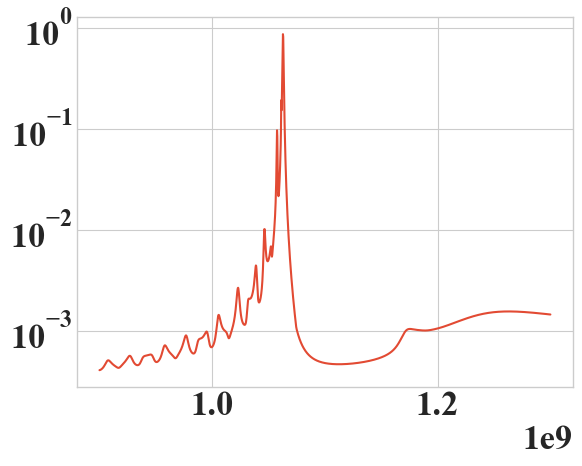

In [395]:
p45 = np.genfromtxt('./loss_picture/result60-45-180.csv')
freq = np.linspace(9*1e8,1.3*1e9,1601)
Y45 = ca16(p45,freq,NT,180*1E-8)
plt.plot(freq,Y45)
plt.yscale('log')

In [471]:
freq = np.linspace(9*1e8,1.3*1e9,1601)
p45 = np.genfromtxt('./loss_picture/Good/result60-45-180.csv')
p55 = np.genfromtxt('./loss_picture/result_2paras_20_2/result60-55-200.csv')
p50 = np.genfromtxt('./loss_picture/result_2paras_50/result60-50-200.csv')
#p50 = np.genfromtxt('./loss_picture/result_2paras_20_2/result60-50-200.csv')
#p50 = np.genfromtxt('./loss_picture/result60-50-200.csv')

In [472]:
NT = 60
mp = 50
pf = 200
suffix = str(int(NT)) + '-' + str(int(mp)) + '-' + str(int(pf)) 
X = np.genfromtxt('D:/data/Data_4paras/result'+suffix+'.csv',delimiter=',')
y_12 = np.genfromtxt('D:/data/Data_2paras/result'+suffix+'.csv',delimiter=',')
Y45 = ca16(p45,freq,NT,180*1E-8)
Y50 = ca2(X,y_12,p50,freq,NT,pf*1e-8)
Y55 = ca2(X,y_12,p55,freq,NT,pf*1e-8)


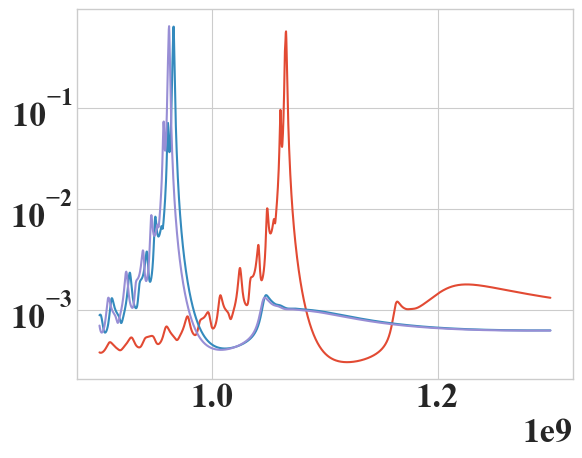

In [474]:
plt.plot(freq,Y45)
plt.plot(freq,Y50)
plt.plot(freq,Y55)
plt.yscale('log')

In [475]:
mp=45
test_path = 'C:\\Users\\caizhi.zheng\\code\\For AI\\SNP Selection/'+'LT'+str(NT)+ 'MP'+str(mp) +'P'+str(18) +'/'
saw_set = rf.read_all_networks(test_path)
for name in saw_set:
    saw = saw_set[name]
s45 = saw['900-1300MHZ'].y[:,0,0]

In [476]:
from PackClass import Plot_all
pp = Plot_all(Y45,Y50,freq,name1='1st brochure',name2='1st brochure')

In [477]:
YZS45 = pp.YtoZS(Y45, freq)
YZS50 = pp.YtoZS(Y50, freq)
YZS55 = pp.YtoZS(Y55, freq)
S55 = pp.YtoZS(s55, freq)
S50 = pp.YtoZS(s50, freq)
S45 = pp.YtoZS(s45, freq)

In [480]:
from math import nan


for i in YZS45:
    i[:400]=nan
    i[1200:]=nan

for i in S45:
    i[:400]=nan
    i[1200:]=nan

for i in S50:
    #i[:400]=nan
    i[800:]=nan

for i in YZS50:
    #i[:400]=nan
    i[800:]=nan

In [481]:
freq = np.linspace(9*1e2,1.3*1e3,1601)

In [482]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

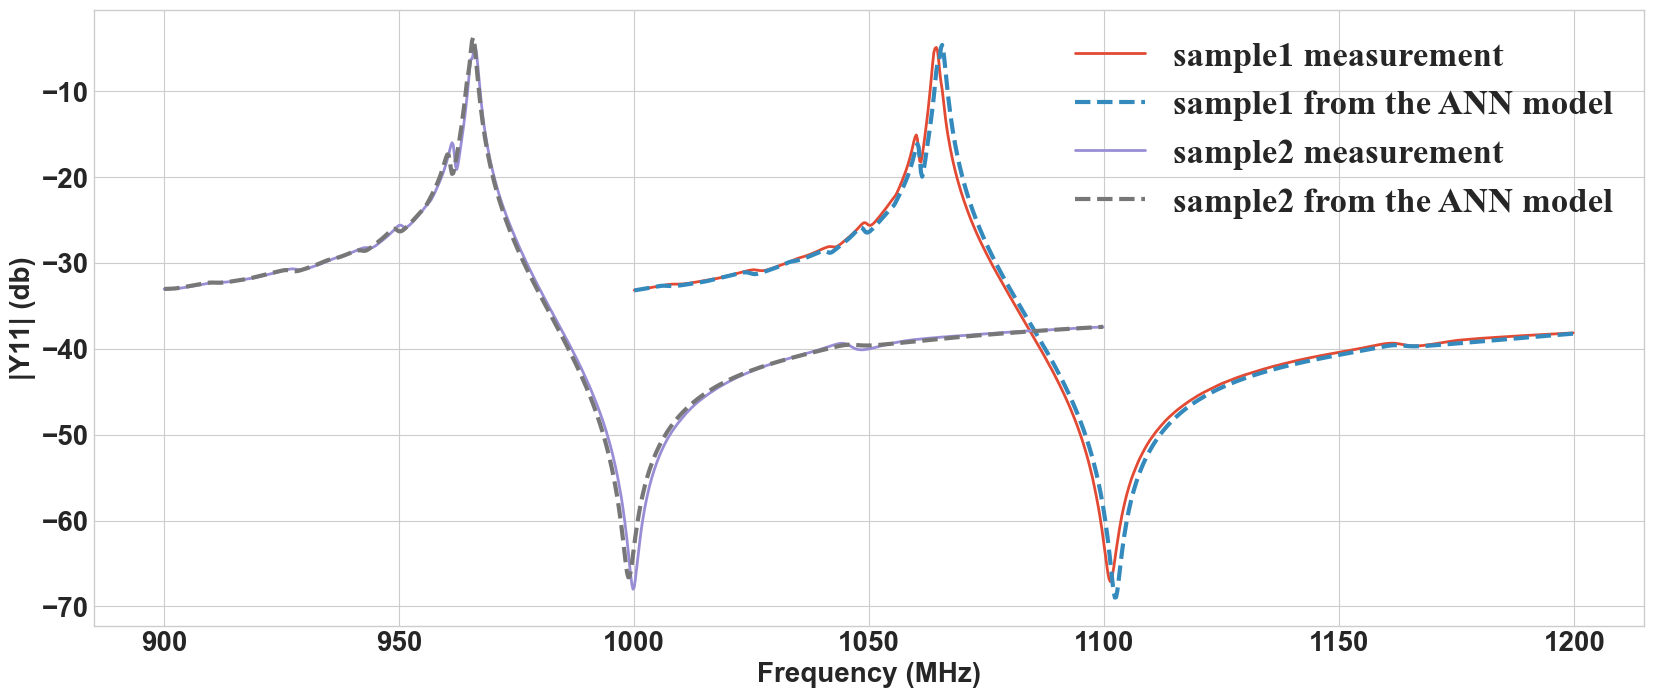

In [483]:

# plt.style.use('Solarize_Light2')
# plt.style.use('classic')
# from proplot import rc


plt.style.use('ggplot')
# plt.style.use('seaborn-v0_8-colorblind')
plt.style.use('seaborn-v0_8-whitegrid')
# plt.style.use('seaborn-v0_8-deep')
# plt.style.use('seaborn-v0_8-muted')

plt.figure(figsize=[20,8])
plt.plot(freq,S45[0],lw=2)
plt.plot(freq,YZS45[0],'--',lw=3)
#plt.xlim(900,1100)
plt.plot(freq,S50[0],lw=2)
plt.plot(freq,YZS50[0],'--',lw=3)
#plt.plot(freq,S55[0],lw=2)
#plt.plot(freq,YZS55[0],'--',lw=3)
plt.grid('on')

# plt.rcParams.update({'font.size': 12})
plt.rc('font',family='Times New Roman',size=25,weight='bold')
plt.xlabel('Frequency (MHz)',size=20,fontweight='bold')
plt.xticks(size=20,fontweight='bold')
plt.yticks(size=20,fontweight='bold')
plt.ylabel('|Y11| (db)',size=20,fontweight='bold')
plt.legend(['sample1 measurement','sample1 from the ANN model','sample2 measurement','sample2 from the ANN model','sample3 measurement','sample3 from the ANN model'])
#plt.legend(['sample1 measurement','sample1 from the ANN model','sample2 measurement','sample2 from the ANN model'])

# plt.savefig('Y11.png',dpi=300,bbox_inches='tight')
# plt.title('ysddfqasf')


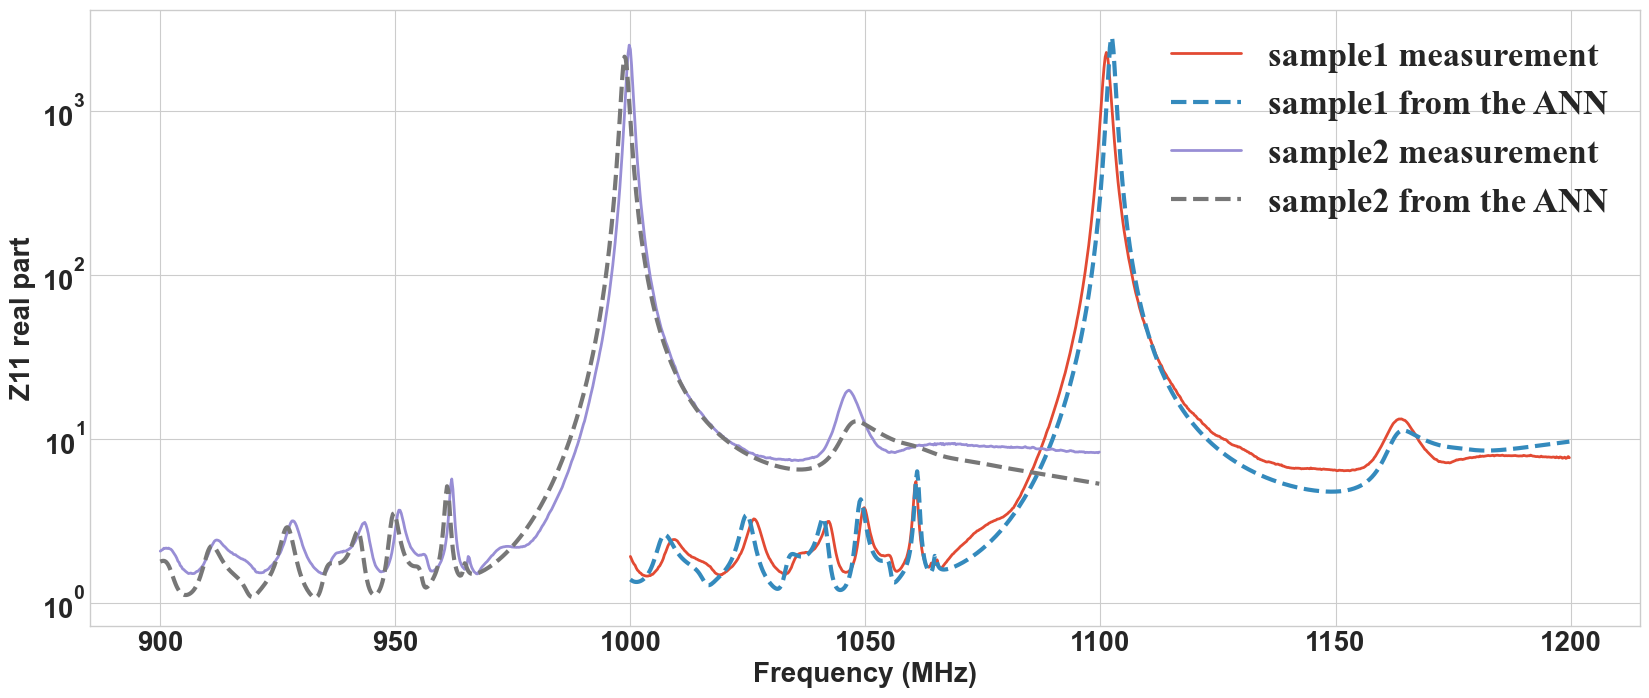

In [484]:
# plt.rc('font',family='Times New Roman', size=8)
# plt.style.use('Solarize_Light2')
# plt.style.use('classic')

plt.style.use('ggplot')
# plt.style.use('seaborn-v0_8-colorblind')
plt.style.use('seaborn-v0_8-whitegrid')
# plt.style.use('seaborn-v0_8-deep')
# plt.style.use('seaborn-v0_8-muted')

plt.figure(figsize=[20,8])
plt.plot(freq,S45[1],lw=2)
plt.plot(freq,YZS45[1],'--',lw=3)
plt.plot(freq,S50[1],lw=2)
plt.plot(freq,YZS50[1],'--',lw=3)
#plt.plot(freq,S55[1],lw=2)
#plt.plot(freq,YZS55[1],'--',lw=3)
plt.grid('on')
plt.rc('font',family='Times New Roman',size=25)
plt.yscale('log')
plt.xlabel('Frequency (MHz)',size=20,fontweight='bold')
plt.xticks(size=20,fontweight='bold')
plt.yticks(size=20,fontweight='bold')
plt.ylabel('Z11 real part',size=20,fontweight='bold')
plt.legend(['sample1 measurement','sample1 from the ANN','sample2 measurement','sample2 from the ANN','sample3 measurement','sample3 from the ANN'])

plt.savefig('Z11.png',dpi=300,bbox_inches='tight')
# plt.title('ysddfqasf')


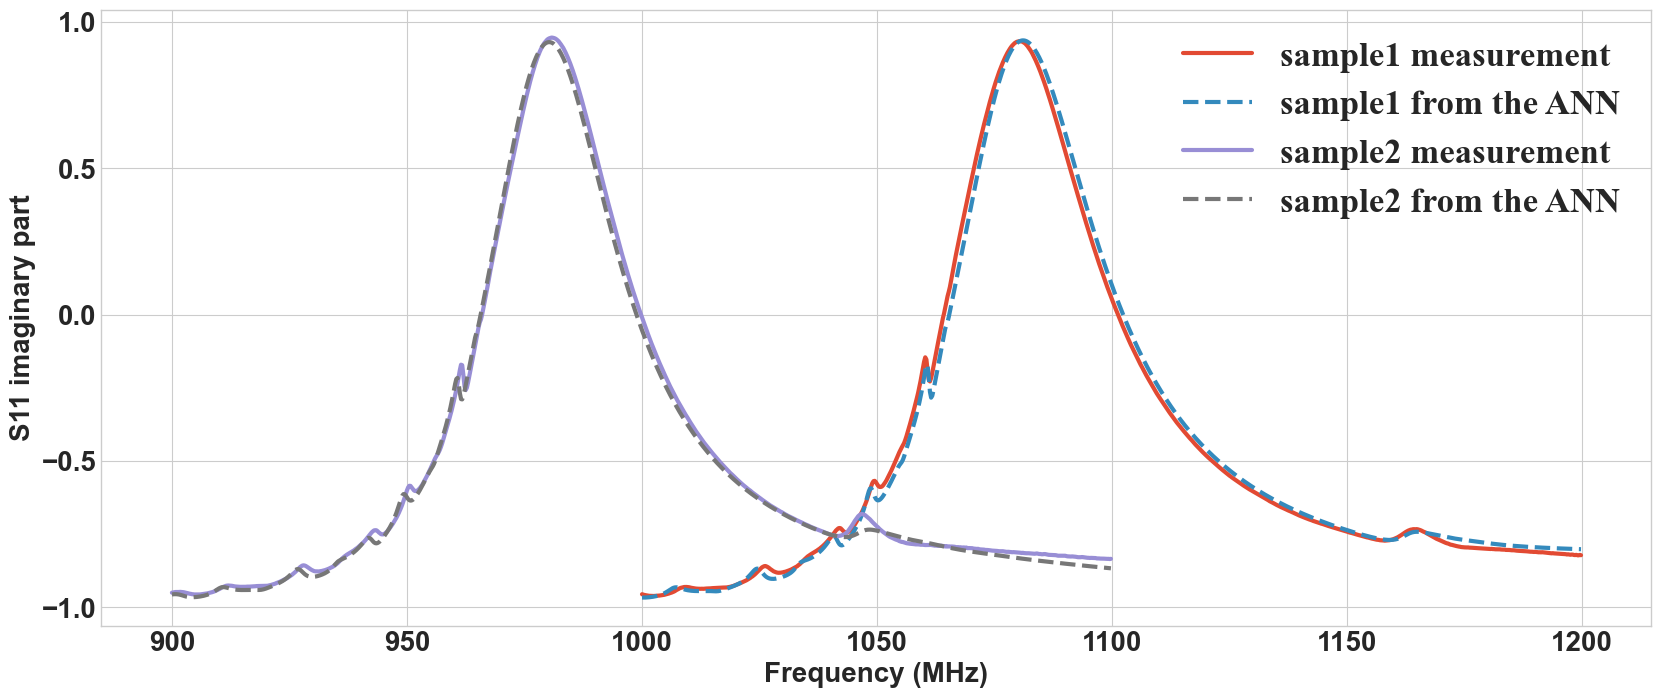

In [485]:
# plt.rc('font',family='Times New Roman', size=8)
# plt.style.use('Solarize_Light2')
# plt.style.use('classic')

plt.style.use('ggplot')
plt.style.use('seaborn-v0_8-whitegrid')
# plt.style.use('seaborn-v0_8-colorblind')
# plt.style.use('seaborn-v0_8-darkgrid')
# plt.style.use('seaborn-v0_8-deep')
# plt.style.use('seaborn-v0_8-muted')

plt.figure(figsize=[20,8])
plt.plot(freq,S45[3],lw=3)
plt.plot(freq,YZS45[3],'--',lw=3)
plt.plot(freq,S50[3],lw=3)
plt.plot(freq,YZS50[3],'--',lw=3)
#plt.plot(freq,S55[3],lw=3)
#plt.plot(freq,YZS55[3],'--',lw=3)
# plt.grid('on')
plt.rc('font',family='Times New Roman',size=25)
plt.ylabel('S11 imaginary part',size=20,fontweight='bold')
# plt.yscale('log')

plt.xlabel('Frequency (MHz)',size=20,fontweight='bold')
plt.xticks(size=20,fontweight='bold')
plt.yticks(size=20,fontweight='bold')
plt.legend(['sample1 measurement','sample1 from the ANN','sample2 measurement','sample2 from the ANN','sample3 measurement','sample3 from the ANN'])

plt.savefig('S11i.png',dpi=300,bbox_inches='tight')
# plt.title('ysddfqasf')


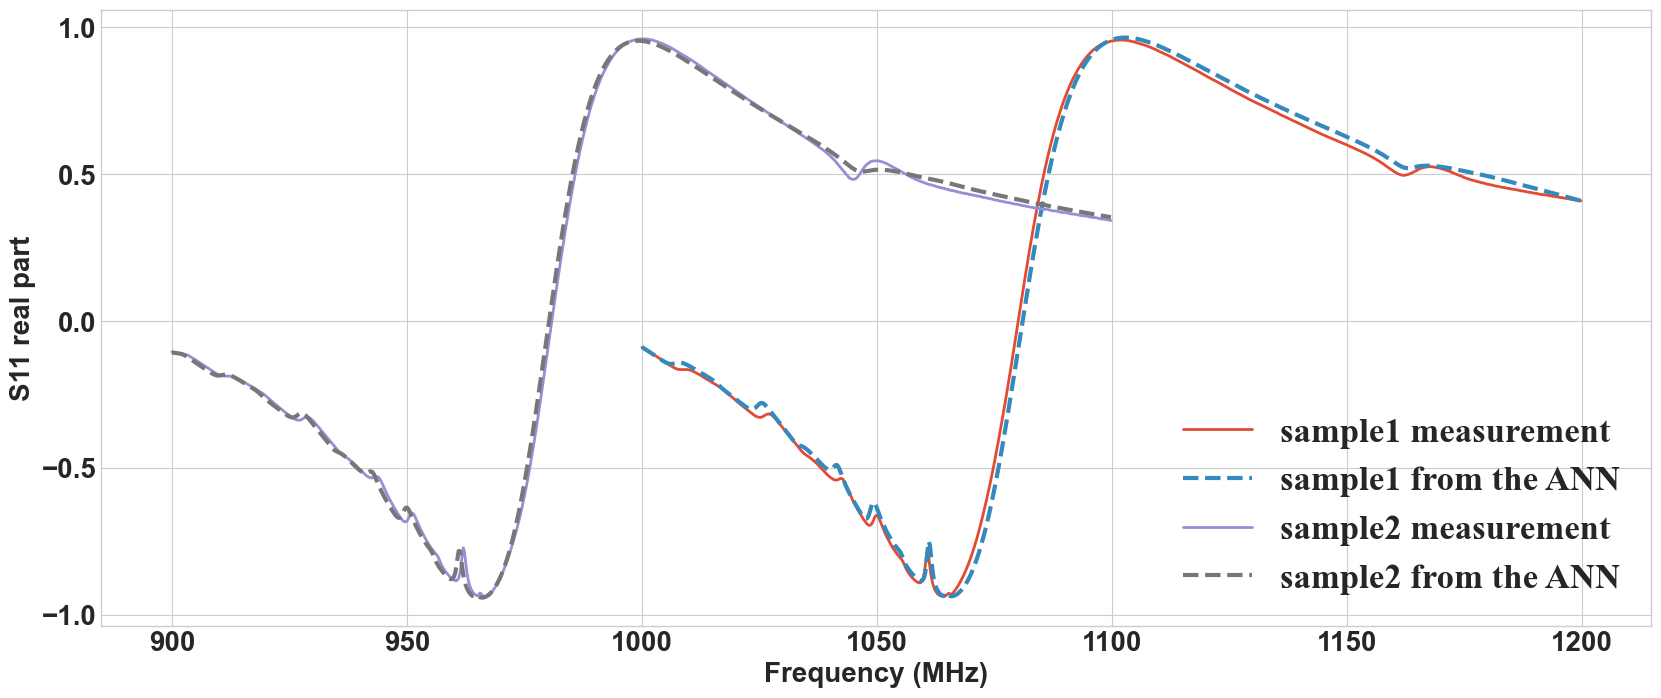

In [486]:
# plt.rc('font',family='Times New Roman', size=8)
# plt.style.use('Solarize_Light2')
# plt.style.use('classic')

plt.style.use('ggplot')
# plt.style.use('seaborn-v0_8-colorblind')
# plt.style.use('seaborn-v0_8-deep')
# plt.style.use('seaborn-v0_8-muted')
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=[20,8])
plt.plot(freq,S45[2],lw=2)
plt.plot(freq,YZS45[2],'--',lw=3)
plt.plot(freq,S50[2],lw=2)
plt.plot(freq,YZS50[2],'--',lw=3)
#plt.plot(freq,S55[2],lw=2)
#plt.plot(freq,YZS55[2],'--',lw=3)
# plt.grid('on')
plt.rc('font',family='Times New Roman',size=25)
plt.xlabel('Frequency (MHz)',size=20,fontweight='bold')
plt.xticks(size=20,fontweight='bold')
plt.yticks(size=20,fontweight='bold')
plt.ylabel('S11 real part',size=20,fontweight='bold')
plt.legend(['sample1 measurement','sample1 from the ANN','sample2 measurement','sample2 from the ANN','sample3 measurement','sample3 from the ANN'])

# plt.legend(['sample1 measurement','sample1 from the output of the model','sample2 measurement','sample2 from the output of the model','sample3 measurement','sample3 from the output of the model']
#            ,fancybox=False,frameon=False)
# plt.legend()
plt.savefig('S11r.png',dpi=300,bbox_inches='tight')
# plt.title('ysddfqasf')


In [52]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [171]:
t45 = np.genfromtxt('D:/data/65-200_train.csv',skip_header=1,delimiter=',')[:,1:3]
t50 = np.genfromtxt('D:/data/50-200_train.csv',skip_header=1,delimiter=',')[:,1:3]
t55 = np.genfromtxt('D:/data/55-200_train.csv',skip_header=1,delimiter=',')[:,1:3]
v45 = np.genfromtxt('D:/data/65-200_validation.csv',skip_header=1,delimiter=',')[:,1:3]
v50 = np.genfromtxt('D:/data/50-200_validation.csv',skip_header=1,delimiter=',')[:,1:3]
v55 = np.genfromtxt('D:/data/55-200_validation.csv',skip_header=1,delimiter=',')[:,1:3]

In [190]:
e45 = np.genfromtxt('D:/data/65-200_traine.csv',skip_header=1,delimiter=',')[:,1:3]
e50 = np.genfromtxt('D:/data/50-200_traine.csv',skip_header=1,delimiter=',')[:,1:3]
e55 = np.genfromtxt('D:/data/55-200_traine.csv',skip_header=1,delimiter=',')[:,1:3]

In [243]:
t55[:,1][0]=nan

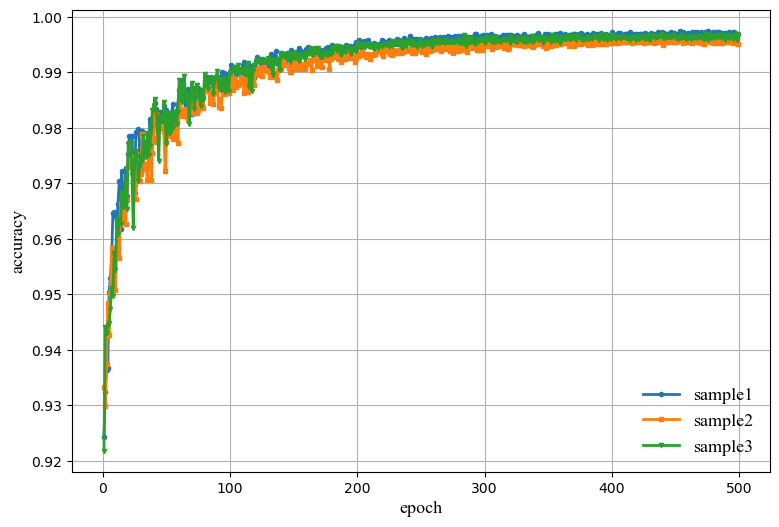

In [351]:
plt.figure(figsize=[9,6])
plt.style.use('default')
# axes1 = plt.subplot(1,2,1)
plt.plot(t45[:,0],t45[:,1],'-o',lw=2,markersize=3)
plt.plot(t45[:,0],t50[:,1],'-s',lw=2,markersize=3)
plt.plot(t45[:,0],t55[:,1],'-v',lw=2,markersize=3)

plt.rc('font',family='Times New Roman',size=13)
plt.xlabel('epoch',font='Times New Roman')
plt.ylabel('accuracy',font='Times New Roman')

# plt.xticks(size=13,fontweight='bold')
# plt.yticks(size=13,fontweight='bold')
# axes1.set_yticks([0.8,0.9,0.95,0.96,0.97,0.98,0.99,1.0])
plt.legend(['sample1','sample2','sample3'],frameon=False,loc=4)
plt.grid('on')
# axes2 = plt.subplot(1,2,2)
# plt.plot(e45[:,0],e45[:,1],'-o',markersize=3)
# plt.plot(e45[:,0],e50[:,1],'-s',markersize=3)
# plt.plot(e45[:,0],e55[:,1],'-v',markersize=3)
# plt.yscale('log')
# plt.xlabel('epoch')
# plt.ylabel('mean square error')
# plt.legend(['sample1','sample2','sample3'],frameon=False)
# plt.grid('on')
plt.savefig('acc.png',dpi=1000,bbox_inches='tight')
# axes2.set_yticks([1e-2,1e-3,1e-4,1e-5,1e-6])

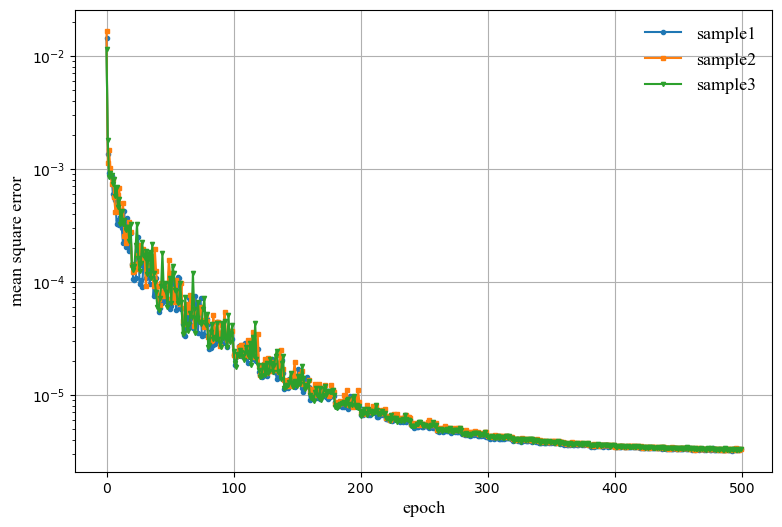

In [354]:
plt.figure(figsize=[9,6])
plt.style.use('default')
# axes1 = plt.subplot(1,2,1)
# plt.plot(t45[:,0],t45[:,1],'-o',lw=2,markersize=3)
# plt.plot(t45[:,0],t50[:,1],'-s',lw=2,markersize=3)
# plt.plot(t45[:,0],t55[:,1],'-v',lw=2,markersize=3)
plt.plot(e45[:,0],e45[:,1],'-o',markersize=3)
plt.plot(e45[:,0],e50[:,1],'-s',markersize=3)
plt.plot(e45[:,0],e55[:,1],'-v',markersize=3)
plt.rc('font',family='Times New Roman',size=13)
plt.xlabel('epoch',font='Times New Roman')
plt.ylabel('mean square error',font='Times New Roman')

# plt.xticks(size=13,fontweight='bold')
# plt.yticks(size=13,fontweight='bold')
# axes1.set_yticks([0.8,0.9,0.95,0.96,0.97,0.98,0.99,1.0])
plt.legend(['sample1','sample2','sample3'],frameon=False)
plt.grid('on')
# axes2 = plt.subplot(1,2,2)

plt.yscale('log')
# plt.xlabel('epoch')
# plt.legend(['sample1','sample2','sample3'],frameon=False)
# plt.grid('on')
plt.savefig('err.png',dpi=1000,bbox_inches='tight')
# axes2.set_yticks([1e-2,1e-3,1e-4,1e-5,1e-6])

In [174]:
t45[0]

array([0.        , 0.79321915])